# Explore here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Download the data

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.shape

(48895, 16)

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.info() # We can see from this step that there are no null entries in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.columns # List out the different columns and access them as needed.

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
Boroughs = data['neighbourhood_group'];

In [12]:
Boroughs.unique() # This column lists out the different Boroughs in New York. 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
neighbourhood = data['neighbourhood']
neighbourhood.unique() # The're 221 different neighbourhoods in the 5 boroughs.

221

In [19]:
# We can groupby the different bouroughs

data.groupby('neighbourhood_group')['neighbourhood'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

In [23]:
data[['neighbourhood_group','neighbourhood']]

,neighbourhood_group,neighbourhood
0,Brooklyn,Kensington
1,Manhattan,Midtown
2,Manhattan,Harlem
3,Brooklyn,Clinton Hill
4,Manhattan,East Harlem
...,...,...
48890,Brooklyn,Bedford-Stuyvesant
48891,Brooklyn,Bushwick
48892,Manhattan,Harlem
48893,Manhattan,Hell's Kitchen


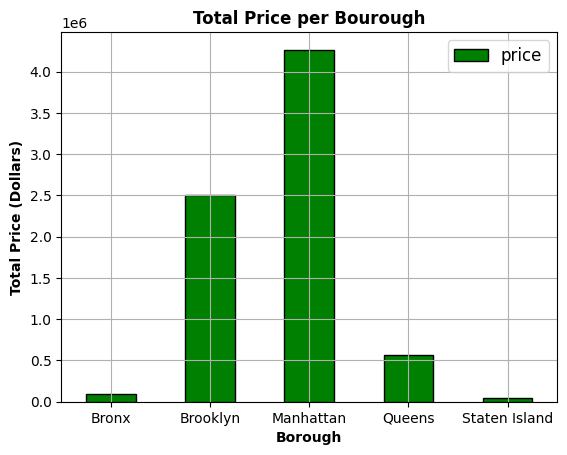

'\nFrom the visual below we can see that Manhattan has the highest prices and staten island the lowest.\n'

In [11]:
# lets look at the prices

data = data[data['price']>0] # This ensures we dont get prices of zero
price_per_borough = data[['price','neighbourhood_group']]
price_per_borough.reset_index(drop=True, inplace=True)
price_per_borough.groupby('neighbourhood_group')['price'].sum().plot.bar(rot=0,color='green',legend=True,edgecolor='black')
plt.xlabel("Borough",fontweight='bold')
plt.ylabel('Total Price (Dollars)',fontweight='bold')
plt.title("Total Price per Bourough",fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)

plt.show()
"""
From the visual below we can see that Manhattan has the highest prices and staten island the lowest.
"""


In [14]:

b = ['Manhattan','Brooklyn','Bronx','Queens','Staten Island']

def summary_stats():
    """
    This function provides some fast summary stats for the prices per Borough.
    """
    for n in b:
        mean_ = data[data['neighbourhood_group']==n][['neighbourhood','price']].price.mean()
        std_ = data[data['neighbourhood_group']==n][['neighbourhood','price']].price.std()
        min_ = data[data['neighbourhood_group']==n][['neighbourhood','price']].price.min()
        max_ = data[data['neighbourhood_group']==n][['neighbourhood','price']].price.max()
        print(f"The mean rent price in {n} is {round(mean_,2)} dollars with a standard deviation of {round(std_,2)} dollars")
        print(f"The minimum rent price is {round(min_,2)} dollars, while the max is {round(max_,2)} dollars")
        print(' ')
summary_stats()

The mean rent price in Manhattan is 196.88 dollars with a standard deviation of 291.39 dollars
The minimum rent price is 10 dollars, while the max is 10000 dollars
 
The mean rent price in Brooklyn is 124.44 dollars with a standard deviation of 186.9 dollars
The minimum rent price is 10 dollars, while the max is 10000 dollars
 
The mean rent price in Bronx is 87.58 dollars with a standard deviation of 106.73 dollars
The minimum rent price is 10 dollars, while the max is 2500 dollars
 
The mean rent price in Queens is 99.52 dollars with a standard deviation of 167.1 dollars
The minimum rent price is 10 dollars, while the max is 10000 dollars
 
The mean rent price in Staten Island is 114.81 dollars with a standard deviation of 277.62 dollars
The minimum rent price is 13 dollars, while the max is 5000 dollars
 


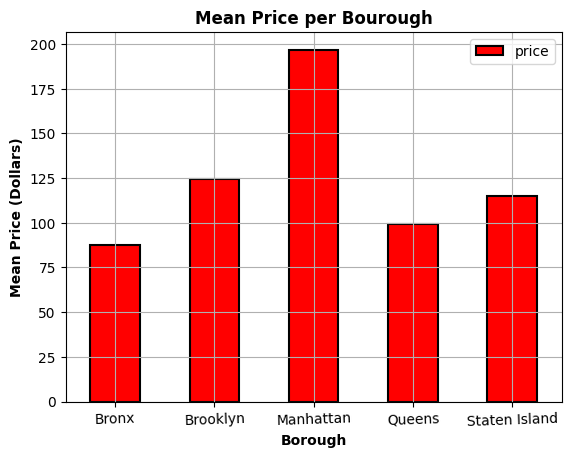

In [83]:
# We can visualize the average price per borough

data = data[data['price']>0] # This ensures we dont get prices of zero
mean_price_per_borough = data[['price','neighbourhood_group']]

mean_price_per_borough.groupby('neighbourhood_group')['price'].mean().plot.bar(rot=2,
                                                                               color='red',
                                                                               legend=True,
                                                                               edgecolor='black',
                                                                               linewidth=1.5)
plt.xlabel("Borough",fontweight='bold')
plt.ylabel('Mean Price (Dollars)',fontweight='bold')
plt.title("Mean Price per Bourough",fontweight='bold')
plt.grid(True)
plt.show()

We can see that Plot 1 and Plot 2 correlate almost exactly with the exception of Queens. We see that the average price in Queens in Plot 2, is less than the total price paid in  Plot 1. This indicates that they're a number of outliers in the price colums for queens, which is reflected in the summary statistics above. 

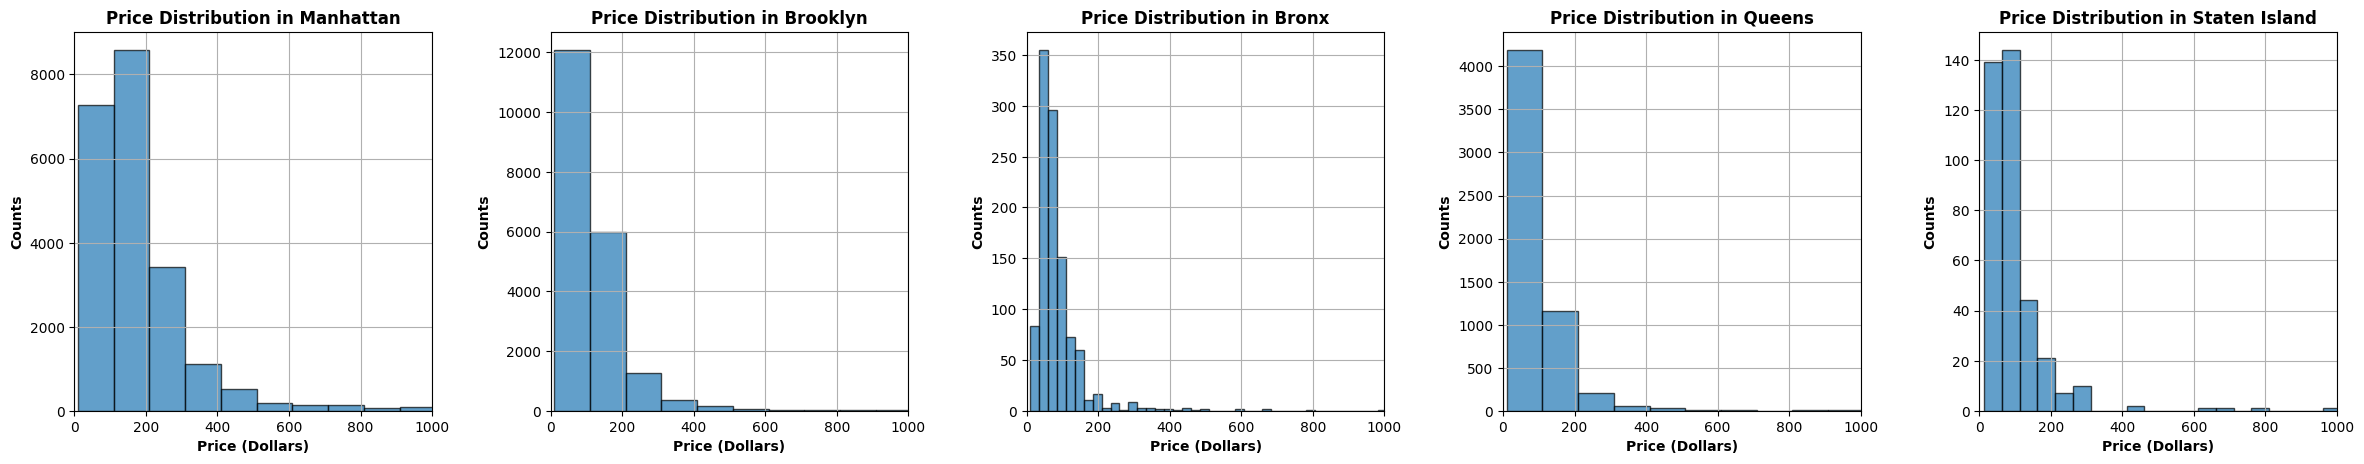

In [16]:
# Lets have a look at the distribution of prices in the Boroughs and compare them to the last two plots.
fig,axes = plt.subplots(1,5,figsize=(24,5))


for i,col in enumerate(b):
    axes[i].hist(data[data['neighbourhood_group']==col][['neighbourhood','price']].price,bins=100,alpha=0.7,edgecolor='black')
    axes[i].set_xlim(0,1000)
    axes[i].set_title(f"Price Distribution in {col}",fontweight='bold')
    axes[i].set_xlabel("Price (Dollars)",fontweight='bold')
    axes[i].set_ylabel("Counts",fontweight='bold')
    axes[i].grid(True)
plt.tight_layout(pad=2)
plt.show()

For all the histograms above, we can see that all of the distributions are highly skewed which is to be expected from the summary statistics. For visual simplicity I restricted the rance of the prices to values up to 5000, and considered higher values to be outliers. We can see that in all of the buroughs the majority of the counts are below 600 with Manhattan having higher counts in more expensive prices. 

In [28]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [20]:
summary.head() # This gives us the count of room type per burough

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


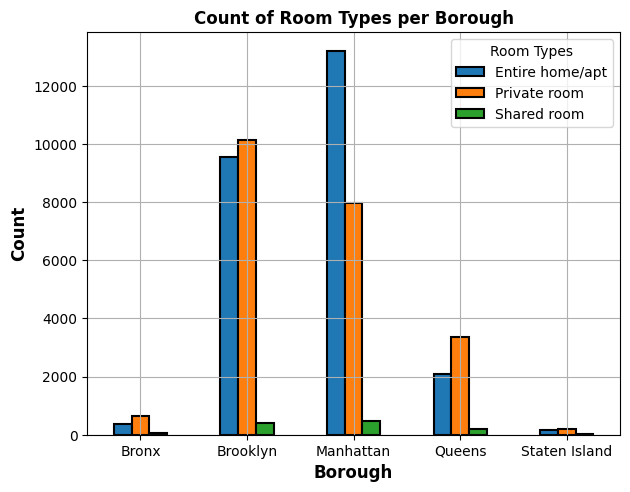

In [18]:
summary = pd.crosstab(data['neighbourhood_group'],data['room_type'])
summary.plot.bar(rot=0,edgecolor='black',linewidth=1.5)
plt.xlabel("Borough",fontweight='bold',fontsize=12)
plt.ylabel("Count",fontweight = 'bold',fontsize='12')
plt.grid(True)
plt.tight_layout()
plt.title("Count of Room Types per Borough",fontweight='bold')
plt.legend(title="Room Types",fontsize=10)
plt.show()

In this plot we see the counts of Room Types per Burough, we see that Manhattan has the highest count of total rooms with 'Private Rooms' and 'Entire Room' being the most common and 'Shared Room' having a similar count as the other Buroughs. 'Entire home' only has the highest count in Manhattan; it is second in all other Burroughs. 'Shared room' is lowest in all Burroughs making it the least popular one. 

In [53]:
# Boroughs and number of Reviews

data[['neighbourhood_group','number_of_reviews']]

,neighbourhood_group,number_of_reviews
0,Brooklyn,9
1,Manhattan,45
2,Manhattan,0
3,Brooklyn,270
4,Manhattan,9
...,...,...
48890,Brooklyn,0
48891,Brooklyn,0
48892,Manhattan,0
48893,Manhattan,0


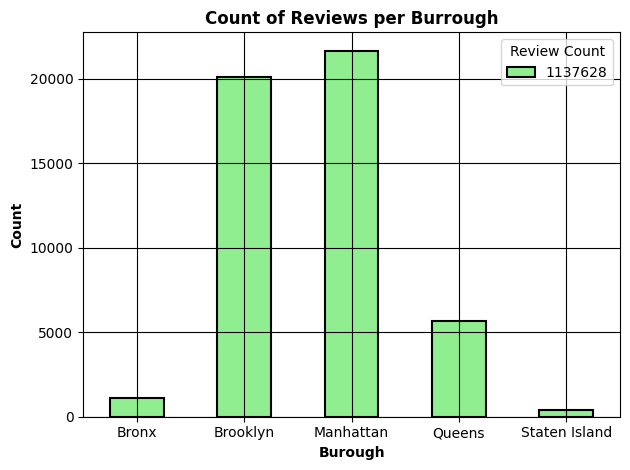

In [90]:
b_price = pd.crosstab(data['neighbourhood_group'],data['number_of_reviews'].sum())

b_price.plot.bar(rot=0,color='lightgreen',edgecolor='black',linewidth=1.5
                 )
plt.xlabel('Burough',fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.title("Count of Reviews per Burrough",fontweight='bold')
plt.legend(title="Review Count")
plt.tight_layout()
plt.grid(True,color='black')
plt.show()

Manhattan and Brroklyn have the highest count of reviews per Burrough. This is consistent with the other plots. Brooklyn and Manhattan are the busiest Burroughs.

In [84]:
# Price and Room Types

p_room_type = pd.crosstab(data['room_type'],data['price'].sum())
p_room_type

col_0,7467278
room_type,
Entire home/apt,25407
Private room,22319
Shared room,1158


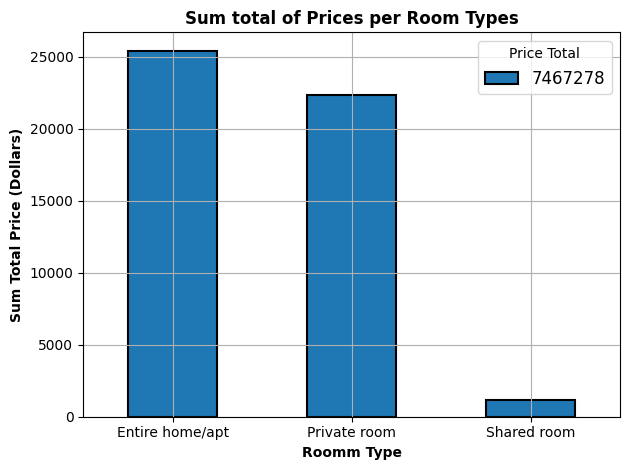

In [91]:
p_room_type.plot.bar(rot=0,edgecolor='black',linewidth=1.5)
plt.title("Sum total of Prices per Room Types",fontweight='bold')
plt.xlabel('Roomm Type',fontweight='bold')
plt.ylabel("Sum Total Price (Dollars)",fontweight='bold')
plt.legend(title="Price Total",fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()

This plot shows total price per room type across all Burroughs. Most of the revenue is coming from room types 'Entire house' and 'Private Room'. 

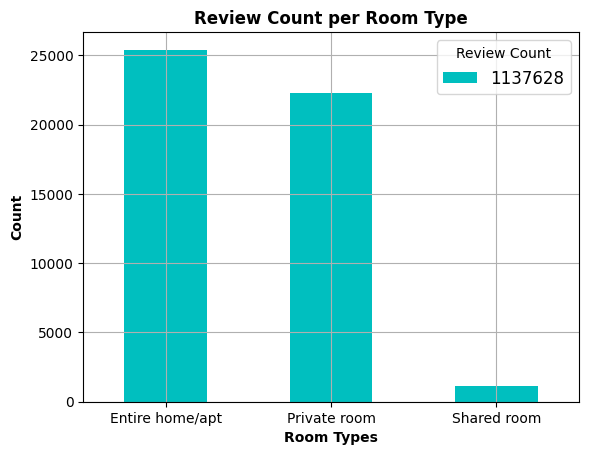

In [107]:
# What is the relationship between the number of reviews and The room types

reviews_room_type = pd.crosstab(data['room_type'],data['number_of_reviews'].sum())
reviews_room_type.plot.bar(rot=0,color='c',linewidth=1.5)
plt.title("Review Count per Room Type",fontweight='bold')
plt.xlabel("Room Types",fontweight='bold')
plt.ylabel("Count",fontweight='bold')
plt.legend(title='Review Count',fontsize=12)
plt.grid(True)
plt.show()


In [99]:
data['price'].sum(),data['number_of_reviews'].sum()

(np.int64(7467278), np.int64(1137628))